# Classify different data sets

### Basic includes

In [1]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


### Classify the Fashion Mnist

---

(60000, 28, 28)


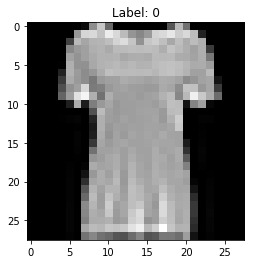

In [5]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [6]:
fashion_train_data = fashion_train_data.reshape((60000, 28 * 28))
fashion_train_data = fashion_train_data.astype('float32') / 255 

fashion_validation_data = fashion_train_data[:10000]
fashion_train_data = fashion_train_data[10000:]

fashion_train_labels = to_categorical(fashion_train_labels) 

fashion_validation_labels = fashion_train_labels[:10000]
fashion_train_labels = fashion_train_labels[10000:]

fashion_test_data = fashion_test_data.reshape((10000, 28 * 28)) 
fashion_test_data = fashion_test_data.astype('float32') / 255

fashion_test_labels = to_categorical(fashion_test_labels)

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [195]:
network = models.Sequential()

network.add(layers.Dense(1024, activation='relu', input_shape=(784,)))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(10, activation='softmax'))

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=5)

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fit_data = network.fit(
    fashion_train_data, 
    fashion_train_labels, 
    batch_size=1000, 
    epochs=35, 
    callbacks=[early_stop],
    validation_data=(fashion_validation_data, fashion_validation_labels)
)

print("Evaluation: ", network.evaluate(fashion_test_data, fashion_test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [==============================] - 15s 290us/step - loss: 0.8469 - acc: 0.6972 - val_loss: 0.4523 - val_acc: 0.8435
Epoch 2/35
50000/50000 [==============================] - 11s 210us/step - loss: 0.4624 - acc: 0.8384 - val_loss: 0.3824 - val_acc: 0.8609
Epoch 3/35
50000/50000 [==============================] - 11s 227us/step - loss: 0.4042 - acc: 0.8562 - val_loss: 0.3664 - val_acc: 0.8670
Epoch 4/35
50000/50000 [==============================] - 11s 217us/step - loss: 0.3600 - acc: 0.8709 - val_loss: 0.3444 - val_acc: 0.8761
Epoch 5/35
50000/50000 [==============================] - 12s 232us/step - loss: 0.3362 - acc: 0.8796 - val_loss: 0.3339 - val_acc: 0.8775
Epoch 6/35
50000/50000 [==============================] - 12s 230us/step - loss: 0.3212 - acc: 0.8828 - val_loss: 0.3258 - val_acc: 0.8850
Epoch 7/35
50000/50000 [==============================] - 13s 262us/step - loss: 0.2959 - acc: 0.8930 - val_loss: 0.

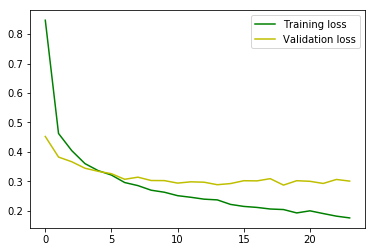

In [196]:
loss = fit_data.history['loss']
acc = fit_data.history['acc']
val_acc = fit_data.history['val_acc']
val_loss = fit_data.history['val_loss']

plt.plot(range(len(loss)), loss, 'g', label='Training loss')
plt.plot(range(len(val_loss)), val_loss, 'y', label='Validation loss')
plt.legend()

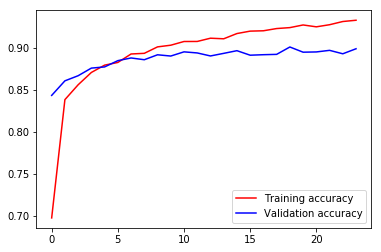

In [197]:
plt.plot(range(len(acc)), acc, 'r', label='Training accuracy')
plt.plot(range(len(val_acc)), val_acc, 'b', label='Validation accuracy')
plt.legend()

### Obtained accuracy: 89%

###### Comments: 

Since we are analyzing images, it is appropriate to use a large neural network and to leverage dropout.

###### Applied techniques:

- Dropout
- Early stopping

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [198]:
(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=4000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [199]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <UNKNOWN> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [200]:
# Turning the output into vector mode, each of length 5000
tokenizer = Tokenizer(num_words=4000)
train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary')
test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')
print(train_data_token.shape)
print(test_data_token.shape)

# One-hot encoding the output
one_hot_train_labels = to_categorical(reuters_train_labels)
one_hot_test_labels = to_categorical(reuters_test_labels)
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)

# Creating a validation set with the first 10000 reviews
validation_data = train_data_token[:1000]
validation_labels = one_hot_train_labels[:1000]

# Creating the input set
x_data = train_data_token[1000:]
y_data = one_hot_train_labels[1000:]
print(x_data.shape)
print(y_data.shape)

(8982, 4000)
(2246, 4000)
(8982, 46)
(2246, 46)
(7982, 4000)
(7982, 46)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [201]:
network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(4000,)))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(46, activation='softmax'))

early_stop = callbacks.EarlyStopping(monitor="val_loss", min_delta= 0.005, patience=8)

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fit_data = network.fit(
    x_data, 
    y_data, 
    batch_size=1000, 
    epochs=35,
    callbacks=[early_stop],
    validation_data=(validation_data, validation_labels)
)

print("Evaluation:", network.evaluate(test_data_token, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/35
7982/7982 [==============================] - 7s 822us/step - loss: 3.4333 - acc: 0.2920 - val_loss: 2.5699 - val_acc: 0.5250
Epoch 2/35
7982/7982 [==============================] - 2s 272us/step - loss: 2.1599 - acc: 0.5500 - val_loss: 1.7534 - val_acc: 0.6060
Epoch 3/35
7982/7982 [==============================] - 3s 318us/step - loss: 1.6731 - acc: 0.6442 - val_loss: 1.5094 - val_acc: 0.6810
Epoch 4/35
7982/7982 [==============================] - 2s 274us/step - loss: 1.4082 - acc: 0.6906 - val_loss: 1.3037 - val_acc: 0.7110
Epoch 5/35
7982/7982 [==============================] - 2s 272us/step - loss: 1.1795 - acc: 0.7276 - val_loss: 1.2026 - val_acc: 0.7170
Epoch 6/35
7982/7982 [==============================] - 2s 272us/step - loss: 1.0031 - acc: 0.7575 - val_loss: 1.1474 - val_acc: 0.7220
Epoch 7/35
7982/7982 [==============================] - 2s 292us/step - loss: 0.8477 - acc: 0.7876 - val_loss: 1.0873 - val_acc: 0.7440


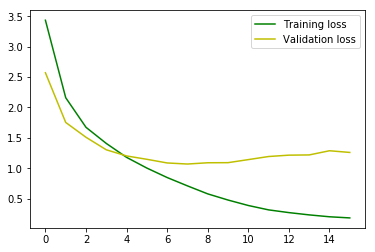

In [202]:
loss = fit_data.history['loss']
acc = fit_data.history['acc']
val_acc = fit_data.history['val_acc']
val_loss = fit_data.history['val_loss']

plt.plot(range(len(loss)), loss, 'g', label='Training loss')
plt.plot(range(len(val_loss)), val_loss, 'y', label='Validation loss')
plt.legend()

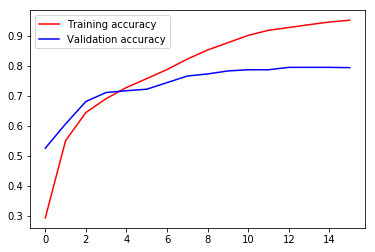

In [203]:
plt.plot(range(len(acc)), acc, 'r', label='Training accuracy')
plt.plot(range(len(val_acc)), val_acc, 'b', label='Validation accuracy')
plt.legend()

### Obtained accuracy: 79%

###### Comments: 

It is interesting to see how text data, just like image data, needs a large neural network to produce acceptable accuracy results.

###### Applied techniques:

- Dropout
- Early stopping

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [204]:
student_data = pd.read_csv("data/student_data.csv")
print(student_data)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

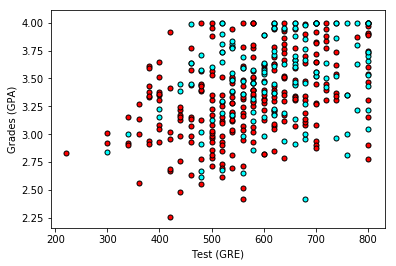

In [205]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

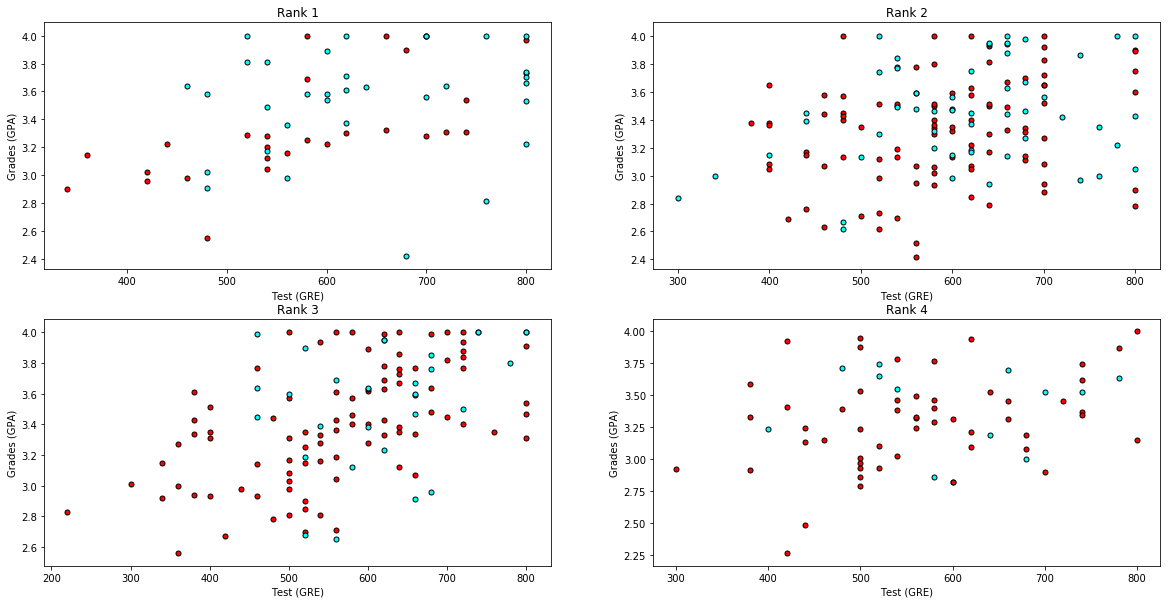

In [206]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')   

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [207]:
student_data = np.array(student_data)
student_data = np.array([[0 if np.isnan(el) else el for el in student] for student in student_data])

gre_mean = np.mean(student_data[:,1])
gre_std = np.std(student_data[:,1])
gpa_mean = np.mean(student_data[:,2])
gpa_std = np.std(student_data[:,2])

pp_data = []
pp_labels = []

for (result, gre, gpa, rank) in student_data:
    pp_gre = (gre - gre_mean) / gre_std
    pp_gpa = (gpa - gpa_mean) / gpa_std
    pp_data.append((
        pp_gre,
        pp_gpa,
        1 if rank == 1 else 0,
        1 if rank == 2 else 0,
        1 if rank == 3 else 0,
        1 if rank == 4 else 0
    ))
    pp_labels.append((
        1 if result == 0 else 0,
        1 if result == 1 else 0
    ))
    
pp_data = np.array(pp_data)
pp_labels = np.array(pp_labels)

print(pp_data.shape)
print(pp_labels.shape)

test_data = pp_data[:100]
test_labels = pp_labels[:100]

train_data = pp_data[100:]
train_labels = pp_labels[100:]

(400, 6)
(400, 2)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [183]:
network = models.Sequential()

network.add(layers.Dense(128, activation='relu', input_shape=(6,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(2, activation='softmax'))

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10)

network.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

fit_data = []

for i in range(3):
    k_val_data = train_data[100 * i : 100 * (i + 1)]
    k_val_labels = train_labels[100 * i : 100 * (i + 1)]
    k_train_data = np.concatenate([train_data[0 : 100 * i], train_data[100 * (i + 1) : 300]])
    k_train_labels = np.concatenate([train_labels[0 : 100 * i], train_labels[100 * (i + 1) : 300]])
    fit_data.append(network.fit(
        k_train_data, 
        k_train_labels, 
        batch_size=200, 
        epochs=1000,
        verbose=2,
        callbacks=[early_stop], 
        validation_data=(k_val_data, k_val_labels)
    ))

print("Evaluation:", network.evaluate(test_data, test_labels))

Train on 200 samples, validate on 100 samples
Epoch 1/1000
 - 3s - loss: 0.7095 - acc: 0.4300 - val_loss: 0.7256 - val_acc: 0.3200
Epoch 2/1000
 - 0s - loss: 0.7074 - acc: 0.4650 - val_loss: 0.7222 - val_acc: 0.3500
Epoch 3/1000
 - 0s - loss: 0.7053 - acc: 0.4700 - val_loss: 0.7188 - val_acc: 0.3800
Epoch 4/1000
 - 0s - loss: 0.7033 - acc: 0.4850 - val_loss: 0.7155 - val_acc: 0.4000
Epoch 5/1000
 - 0s - loss: 0.7014 - acc: 0.5050 - val_loss: 0.7123 - val_acc: 0.4300
Epoch 6/1000
 - 0s - loss: 0.6995 - acc: 0.4950 - val_loss: 0.7092 - val_acc: 0.4600
Epoch 7/1000
 - 0s - loss: 0.6977 - acc: 0.4950 - val_loss: 0.7061 - val_acc: 0.4900
Epoch 8/1000
 - 0s - loss: 0.6959 - acc: 0.4950 - val_loss: 0.7032 - val_acc: 0.5100
Epoch 9/1000
 - 0s - loss: 0.6942 - acc: 0.5100 - val_loss: 0.7003 - val_acc: 0.5200
Epoch 10/1000
 - 0s - loss: 0.6926 - acc: 0.5300 - val_loss: 0.6975 - val_acc: 0.5300
Epoch 11/1000
 - 0s - loss: 0.6909 - acc: 0.5500 - val_loss: 0.6948 - val_acc: 0.5600
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.6367 - acc: 0.6450 - val_loss: 0.5939 - val_acc: 0.7500
Epoch 97/1000
 - 0s - loss: 0.6364 - acc: 0.6450 - val_loss: 0.5934 - val_acc: 0.7500
Epoch 98/1000
 - 0s - loss: 0.6362 - acc: 0.6450 - val_loss: 0.5930 - val_acc: 0.7500
Epoch 99/1000
 - 0s - loss: 0.6360 - acc: 0.6450 - val_loss: 0.5926 - val_acc: 0.7500
Epoch 100/1000
 - 0s - loss: 0.6358 - acc: 0.6450 - val_loss: 0.5922 - val_acc: 0.7500
Epoch 101/1000
 - 0s - loss: 0.6355 - acc: 0.6450 - val_loss: 0.5918 - val_acc: 0.7500
Epoch 102/1000
 - 0s - loss: 0.6353 - acc: 0.6450 - val_loss: 0.5914 - val_acc: 0.7500
Epoch 103/1000
 - 0s - loss: 0.6351 - acc: 0.6450 - val_loss: 0.5910 - val_acc: 0.7500
Epoch 104/1000
 - 0s - loss: 0.6349 - acc: 0.6450 - val_loss: 0.5906 - val_acc: 0.7500
Epoch 105/1000
 - 0s - loss: 0.6347 - acc: 0.6450 - val_loss: 0.5902 - val_acc: 0.7500
Epoch 106/1000
 - 0s - loss: 0.6345 - acc: 0.6450 - val_loss: 0.5898 - val_acc: 0.7500
Epoch 107/1000
 - 0s - loss: 0.6343 - acc: 0.64

Epoch 191/1000
 - 0s - loss: 0.6225 - acc: 0.6450 - val_loss: 0.5718 - val_acc: 0.7500
Epoch 192/1000
 - 0s - loss: 0.6224 - acc: 0.6450 - val_loss: 0.5717 - val_acc: 0.7500
Epoch 193/1000
 - 0s - loss: 0.6223 - acc: 0.6450 - val_loss: 0.5716 - val_acc: 0.7500
Epoch 194/1000
 - 0s - loss: 0.6222 - acc: 0.6450 - val_loss: 0.5715 - val_acc: 0.7500
Epoch 195/1000
 - 0s - loss: 0.6221 - acc: 0.6450 - val_loss: 0.5713 - val_acc: 0.7500
Epoch 196/1000
 - 0s - loss: 0.6220 - acc: 0.6450 - val_loss: 0.5712 - val_acc: 0.7500
Epoch 197/1000
 - 0s - loss: 0.6219 - acc: 0.6450 - val_loss: 0.5711 - val_acc: 0.7500
Epoch 198/1000
 - 0s - loss: 0.6218 - acc: 0.6450 - val_loss: 0.5710 - val_acc: 0.7500
Epoch 199/1000
 - 0s - loss: 0.6217 - acc: 0.6450 - val_loss: 0.5709 - val_acc: 0.7500
Epoch 200/1000
 - 0s - loss: 0.6216 - acc: 0.6450 - val_loss: 0.5708 - val_acc: 0.7500
Epoch 201/1000
 - 0s - loss: 0.6215 - acc: 0.6450 - val_loss: 0.5707 - val_acc: 0.7500
Epoch 202/1000
 - 0s - loss: 0.6214 - acc: 

 - 0s - loss: 0.6143 - acc: 0.6500 - val_loss: 0.5638 - val_acc: 0.7400
Epoch 286/1000
 - 0s - loss: 0.6142 - acc: 0.6500 - val_loss: 0.5638 - val_acc: 0.7400
Epoch 287/1000
 - 0s - loss: 0.6141 - acc: 0.6500 - val_loss: 0.5637 - val_acc: 0.7400
Epoch 288/1000
 - 0s - loss: 0.6140 - acc: 0.6500 - val_loss: 0.5637 - val_acc: 0.7400
Epoch 289/1000
 - 0s - loss: 0.6140 - acc: 0.6500 - val_loss: 0.5636 - val_acc: 0.7400
Epoch 290/1000
 - 0s - loss: 0.6139 - acc: 0.6500 - val_loss: 0.5635 - val_acc: 0.7400
Epoch 291/1000
 - 0s - loss: 0.6138 - acc: 0.6500 - val_loss: 0.5635 - val_acc: 0.7400
Epoch 292/1000
 - 0s - loss: 0.6137 - acc: 0.6500 - val_loss: 0.5634 - val_acc: 0.7400
Epoch 293/1000
 - 0s - loss: 0.6137 - acc: 0.6500 - val_loss: 0.5634 - val_acc: 0.7400
Epoch 294/1000
 - 0s - loss: 0.6136 - acc: 0.6500 - val_loss: 0.5633 - val_acc: 0.7400
Epoch 295/1000
 - 0s - loss: 0.6135 - acc: 0.6500 - val_loss: 0.5632 - val_acc: 0.7400
Epoch 296/1000
 - 0s - loss: 0.6134 - acc: 0.6500 - val_lo

Epoch 380/1000
 - 0s - loss: 0.6077 - acc: 0.6650 - val_loss: 0.5593 - val_acc: 0.7600
Epoch 381/1000
 - 0s - loss: 0.6077 - acc: 0.6650 - val_loss: 0.5592 - val_acc: 0.7600
Epoch 382/1000
 - 0s - loss: 0.6076 - acc: 0.6650 - val_loss: 0.5592 - val_acc: 0.7600
Epoch 383/1000
 - 0s - loss: 0.6075 - acc: 0.6650 - val_loss: 0.5591 - val_acc: 0.7700
Epoch 384/1000
 - 0s - loss: 0.6075 - acc: 0.6650 - val_loss: 0.5591 - val_acc: 0.7700
Epoch 385/1000
 - 0s - loss: 0.6074 - acc: 0.6650 - val_loss: 0.5591 - val_acc: 0.7700
Epoch 386/1000
 - 0s - loss: 0.6073 - acc: 0.6650 - val_loss: 0.5590 - val_acc: 0.7700
Epoch 387/1000
 - 0s - loss: 0.6073 - acc: 0.6650 - val_loss: 0.5590 - val_acc: 0.7700
Epoch 388/1000
 - 0s - loss: 0.6072 - acc: 0.6650 - val_loss: 0.5590 - val_acc: 0.7700
Epoch 389/1000
 - 0s - loss: 0.6072 - acc: 0.6650 - val_loss: 0.5589 - val_acc: 0.7700
Epoch 390/1000
 - 0s - loss: 0.6071 - acc: 0.6650 - val_loss: 0.5589 - val_acc: 0.7700
Epoch 391/1000
 - 0s - loss: 0.6070 - acc: 

 - 0s - loss: 0.6024 - acc: 0.6700 - val_loss: 0.5560 - val_acc: 0.7700
Epoch 475/1000
 - 0s - loss: 0.6023 - acc: 0.6700 - val_loss: 0.5560 - val_acc: 0.7700
Epoch 476/1000
 - 0s - loss: 0.6023 - acc: 0.6700 - val_loss: 0.5560 - val_acc: 0.7700
Epoch 477/1000
 - 0s - loss: 0.6022 - acc: 0.6750 - val_loss: 0.5559 - val_acc: 0.7700
Epoch 478/1000
 - 0s - loss: 0.6022 - acc: 0.6750 - val_loss: 0.5559 - val_acc: 0.7700
Epoch 479/1000
 - 0s - loss: 0.6021 - acc: 0.6750 - val_loss: 0.5559 - val_acc: 0.7700
Epoch 480/1000
 - 0s - loss: 0.6021 - acc: 0.6750 - val_loss: 0.5558 - val_acc: 0.7700
Epoch 481/1000
 - 0s - loss: 0.6020 - acc: 0.6750 - val_loss: 0.5558 - val_acc: 0.7700
Epoch 482/1000
 - 0s - loss: 0.6020 - acc: 0.6700 - val_loss: 0.5558 - val_acc: 0.7700
Epoch 483/1000
 - 0s - loss: 0.6019 - acc: 0.6700 - val_loss: 0.5557 - val_acc: 0.7700
Epoch 484/1000
 - 0s - loss: 0.6019 - acc: 0.6700 - val_loss: 0.5557 - val_acc: 0.7800
Epoch 485/1000
 - 0s - loss: 0.6018 - acc: 0.6700 - val_lo

Epoch 569/1000
 - 0s - loss: 0.5979 - acc: 0.6700 - val_loss: 0.5531 - val_acc: 0.7900
Epoch 570/1000
 - 0s - loss: 0.5978 - acc: 0.6750 - val_loss: 0.5531 - val_acc: 0.7900
Epoch 571/1000
 - 0s - loss: 0.5978 - acc: 0.6750 - val_loss: 0.5531 - val_acc: 0.7900
Epoch 572/1000
 - 0s - loss: 0.5977 - acc: 0.6750 - val_loss: 0.5531 - val_acc: 0.7900
Epoch 573/1000
 - 0s - loss: 0.5977 - acc: 0.6750 - val_loss: 0.5530 - val_acc: 0.7900
Epoch 574/1000
 - 0s - loss: 0.5976 - acc: 0.6750 - val_loss: 0.5530 - val_acc: 0.7900
Epoch 575/1000
 - 0s - loss: 0.5976 - acc: 0.6750 - val_loss: 0.5530 - val_acc: 0.7900
Epoch 576/1000
 - 0s - loss: 0.5975 - acc: 0.6750 - val_loss: 0.5530 - val_acc: 0.7900
Epoch 577/1000
 - 0s - loss: 0.5975 - acc: 0.6750 - val_loss: 0.5529 - val_acc: 0.7900
Epoch 578/1000
 - 0s - loss: 0.5974 - acc: 0.6750 - val_loss: 0.5529 - val_acc: 0.7900
Epoch 579/1000
 - 0s - loss: 0.5974 - acc: 0.6750 - val_loss: 0.5529 - val_acc: 0.7900
Epoch 580/1000
 - 0s - loss: 0.5974 - acc: 

 - 0s - loss: 0.5938 - acc: 0.6750 - val_loss: 0.5512 - val_acc: 0.7900
Epoch 664/1000
 - 0s - loss: 0.5938 - acc: 0.6750 - val_loss: 0.5511 - val_acc: 0.7900
Epoch 665/1000
 - 0s - loss: 0.5938 - acc: 0.6750 - val_loss: 0.5511 - val_acc: 0.7900
Epoch 666/1000
 - 0s - loss: 0.5937 - acc: 0.6800 - val_loss: 0.5511 - val_acc: 0.7900
Epoch 667/1000
 - 0s - loss: 0.5937 - acc: 0.6800 - val_loss: 0.5511 - val_acc: 0.7900
Epoch 668/1000
 - 0s - loss: 0.5936 - acc: 0.6800 - val_loss: 0.5511 - val_acc: 0.7900
Epoch 669/1000
 - 0s - loss: 0.5936 - acc: 0.6800 - val_loss: 0.5511 - val_acc: 0.7900
Epoch 670/1000
 - 0s - loss: 0.5936 - acc: 0.6800 - val_loss: 0.5510 - val_acc: 0.7900
Epoch 671/1000
 - 0s - loss: 0.5935 - acc: 0.6800 - val_loss: 0.5510 - val_acc: 0.7900
Epoch 672/1000
 - 0s - loss: 0.5935 - acc: 0.6800 - val_loss: 0.5510 - val_acc: 0.7900
Epoch 673/1000
 - 0s - loss: 0.5934 - acc: 0.6800 - val_loss: 0.5510 - val_acc: 0.7900
Epoch 674/1000
 - 0s - loss: 0.5934 - acc: 0.6800 - val_lo

Epoch 758/1000
 - 0s - loss: 0.5903 - acc: 0.6850 - val_loss: 0.5496 - val_acc: 0.7800
Epoch 759/1000
 - 0s - loss: 0.5902 - acc: 0.6850 - val_loss: 0.5496 - val_acc: 0.7800
Epoch 760/1000
 - 0s - loss: 0.5902 - acc: 0.6850 - val_loss: 0.5496 - val_acc: 0.7800
Epoch 761/1000
 - 0s - loss: 0.5902 - acc: 0.6850 - val_loss: 0.5495 - val_acc: 0.7800
Epoch 762/1000
 - 0s - loss: 0.5901 - acc: 0.6850 - val_loss: 0.5495 - val_acc: 0.7800
Epoch 763/1000
 - 0s - loss: 0.5901 - acc: 0.6850 - val_loss: 0.5495 - val_acc: 0.7800
Epoch 764/1000
 - 0s - loss: 0.5901 - acc: 0.6850 - val_loss: 0.5495 - val_acc: 0.7800
Epoch 765/1000
 - 0s - loss: 0.5900 - acc: 0.6850 - val_loss: 0.5495 - val_acc: 0.7800
Epoch 766/1000
 - 0s - loss: 0.5900 - acc: 0.6850 - val_loss: 0.5495 - val_acc: 0.7800
Epoch 767/1000
 - 0s - loss: 0.5900 - acc: 0.6850 - val_loss: 0.5495 - val_acc: 0.7800
Epoch 768/1000
 - 0s - loss: 0.5899 - acc: 0.6850 - val_loss: 0.5494 - val_acc: 0.7800
Epoch 769/1000
 - 0s - loss: 0.5899 - acc: 

 - 0s - loss: 0.5871 - acc: 0.7000 - val_loss: 0.5484 - val_acc: 0.7700
Epoch 853/1000
 - 0s - loss: 0.5871 - acc: 0.6950 - val_loss: 0.5484 - val_acc: 0.7700
Epoch 854/1000
 - 0s - loss: 0.5870 - acc: 0.6950 - val_loss: 0.5484 - val_acc: 0.7700
Epoch 855/1000
 - 0s - loss: 0.5870 - acc: 0.6950 - val_loss: 0.5483 - val_acc: 0.7700
Epoch 856/1000
 - 0s - loss: 0.5870 - acc: 0.6950 - val_loss: 0.5483 - val_acc: 0.7700
Epoch 857/1000
 - 0s - loss: 0.5869 - acc: 0.6950 - val_loss: 0.5483 - val_acc: 0.7700
Epoch 858/1000
 - 0s - loss: 0.5869 - acc: 0.6900 - val_loss: 0.5483 - val_acc: 0.7700
Epoch 859/1000
 - 0s - loss: 0.5869 - acc: 0.6900 - val_loss: 0.5483 - val_acc: 0.7700
Epoch 860/1000
 - 0s - loss: 0.5868 - acc: 0.6900 - val_loss: 0.5483 - val_acc: 0.7700
Epoch 861/1000
 - 0s - loss: 0.5868 - acc: 0.6900 - val_loss: 0.5483 - val_acc: 0.7700
Epoch 862/1000
 - 0s - loss: 0.5868 - acc: 0.6900 - val_loss: 0.5483 - val_acc: 0.7700
Epoch 863/1000
 - 0s - loss: 0.5868 - acc: 0.6900 - val_lo

Epoch 947/1000
 - 0s - loss: 0.5842 - acc: 0.6900 - val_loss: 0.5473 - val_acc: 0.7800
Epoch 948/1000
 - 0s - loss: 0.5841 - acc: 0.6900 - val_loss: 0.5473 - val_acc: 0.7800
Epoch 949/1000
 - 0s - loss: 0.5841 - acc: 0.6900 - val_loss: 0.5473 - val_acc: 0.7800
Epoch 950/1000
 - 0s - loss: 0.5841 - acc: 0.6900 - val_loss: 0.5472 - val_acc: 0.7800
Epoch 951/1000
 - 0s - loss: 0.5841 - acc: 0.6900 - val_loss: 0.5472 - val_acc: 0.7800
Epoch 952/1000
 - 0s - loss: 0.5840 - acc: 0.6900 - val_loss: 0.5472 - val_acc: 0.7800
Epoch 953/1000
 - 0s - loss: 0.5840 - acc: 0.6900 - val_loss: 0.5472 - val_acc: 0.7800
Epoch 954/1000
 - 0s - loss: 0.5840 - acc: 0.6900 - val_loss: 0.5472 - val_acc: 0.7800
Epoch 955/1000
 - 0s - loss: 0.5839 - acc: 0.6900 - val_loss: 0.5472 - val_acc: 0.7800
Epoch 956/1000
 - 0s - loss: 0.5839 - acc: 0.6900 - val_loss: 0.5472 - val_acc: 0.7800
Epoch 957/1000
 - 0s - loss: 0.5839 - acc: 0.6900 - val_loss: 0.5472 - val_acc: 0.7800
Epoch 958/1000
 - 0s - loss: 0.5838 - acc: 

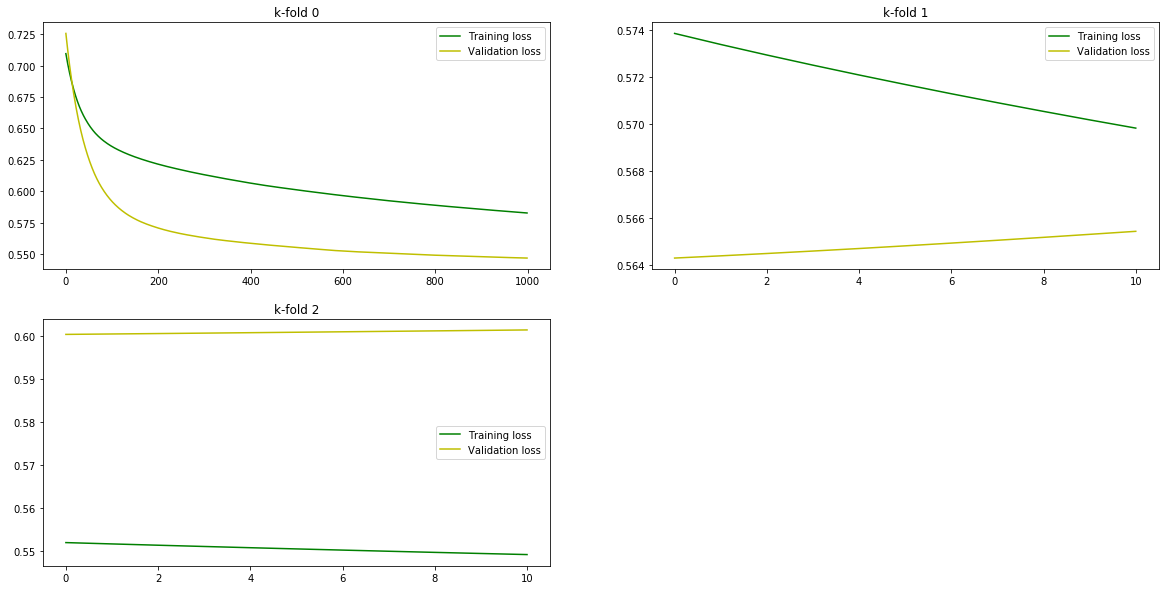

In [188]:
f, plots = plt.subplots(2, 2, figsize=(20, 10))
plots[-1, -1].axis('off')

for (i, (k_fit_data, plot)) in enumerate(zip(fit_data, [plot for sublist in plots for plot in sublist])):
    loss = k_fit_data.history['loss']
    val_loss = k_fit_data.history['val_loss']
    
    plot.plot(range(len(loss)), loss, 'g', label='Training loss')
    plot.plot(range(len(val_loss)), val_loss, 'y', label='Validation loss')
    plot.set_title('k-fold ' + str(i))
    plot.legend()

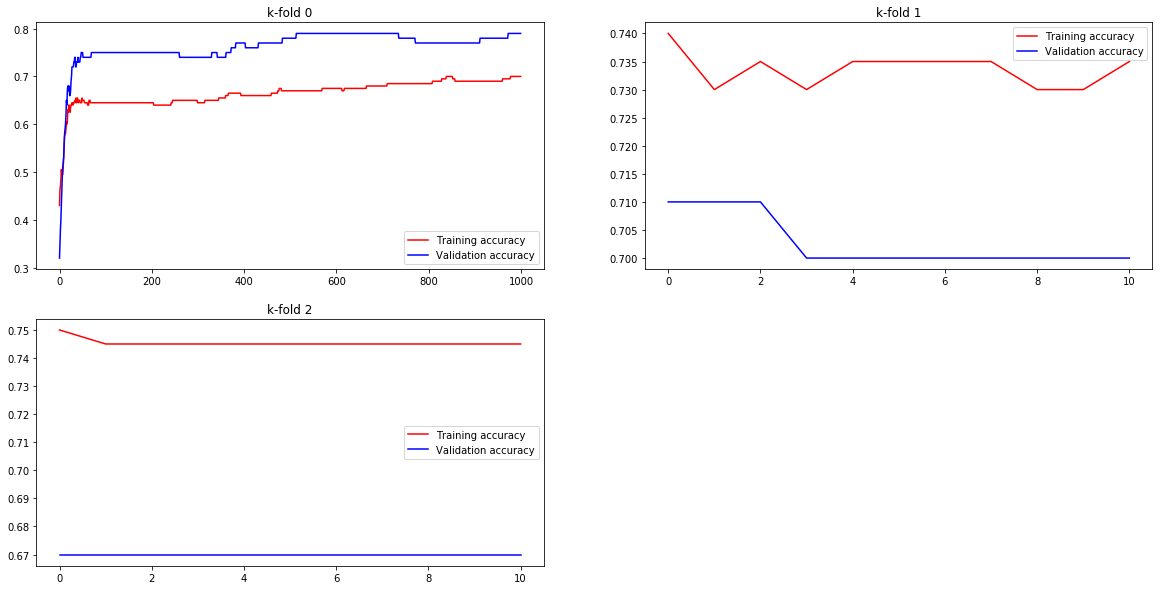

In [189]:
f, plots = plt.subplots(2, 2, figsize=(20, 10))
plots[-1, -1].axis('off')

for (i, (k_fit_data, plot)) in enumerate(zip(fit_data, [plot for sublist in plots for plot in sublist])):
    acc = k_fit_data.history['acc']
    val_acc = k_fit_data.history['val_acc']
    
    plot.plot(range(len(acc)), acc, 'r', label='Training accuracy')
    plot.plot(range(len(val_acc)), val_acc, 'b', label='Validation accuracy')
    plot.set_title('k-fold ' + str(i))
    plot.legend()

### Obtained accuracy: 72%

###### Comments: 

This dataset is particularly small, and no obvious patterns are detectable for a human observer. It is therefore expected that the accuracy will be low.

###### Applied techniques:

- Early stopping
- One-hot-encoding of ranks
- Data standardization using averaging and standard deviation
- k-fold switching between validation and training sets